In [1]:
cd student

C:\Users\Mukesh  Yadav\Documents\python project\student


In [2]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

#Print you can execute arbitrary python code
train = pd.read_csv("trainPort.csv" )
test = pd.read_csv("testPort.csv")

#Print to standard output, and see the results in the "log" section below after running your script
print("\n\nTop of the training data:")
print(train.head())

print("\n\nSummary statistics of training data")
print(train.describe())

C:\Users\Mukesh  Yadav\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)




Top of the training data:
   Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
0         402     GP   F   17       U     GT3       T     4     3    health   
1         553     MS   M   17       U     LE3       A     1     0     other   
2         285     GP   M   16       R     GT3       T     2     1     other   
3         497     MS   M   17       U     GT3       T     3     3  services   
4         138     GP   M   15       R     GT3       T     3     4   at_home   

  ... famrel freetime goout  Dalc  Walc  health absences PG1 PG2 PG3  
0 ...      4        4     3     1     3       4        0  11  12  13  
1 ...      4        1     2     1     1       5        4  11  11  12  
2 ...      3        3     2     1     3       3        2  14  13  12  
3 ...      5        4     5     3     4       5        0  10  11  10  
4 ...      5        3     3     1     1       5        2  12  11  11  

[5 rows x 34 columns]


Summary statistics of training data
       Unn

In [3]:
train.columns

Index([u'Unnamed: 0', u'school', u'sex', u'age', u'address', u'famsize',
       u'Pstatus', u'Medu', u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian',
       u'traveltime', u'studytime', u'failures', u'schoolsup', u'famsup',
       u'paid', u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'PG1', u'PG2', u'PG3'],
      dtype='object')

In [4]:
# Split train set to X(features), Y(labels)
print("\n\nTrain set size: %s" % (train.shape,))
X = train.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'PG1', 'PG2']]
Y = train.loc[:,"PG3"]
print("\n\nTop of features:")
print(X.head())
print("\n\nTop of labels")
print(Y.head())



Train set size: (454, 34)


Top of features:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob ...  \
0     GP   F   17       U     GT3       T     4     3    health    other ...   
1     MS   M   17       U     LE3       A     1     0     other    other ...   
2     GP   M   16       R     GT3       T     2     1     other    other ...   
3     MS   M   17       U     GT3       T     3     3  services  at_home ...   
4     GP   M   15       R     GT3       T     3     4   at_home  teacher ...   

  romantic famrel  freetime  goout  Dalc Walc health absences PG1 PG2  
0      yes      4         4      3     1    3      4        0  11  12  
1      yes      4         1      2     1    1      5        4  11  11  
2       no      3         3      2     1    3      3        2  14  13  
3       no      5         4      5     3    4      5        0  10  11  
4      yes      5         3      3     1    1      5        2  12  11  

[5 rows x 32 columns]


Top of labels
0

In [5]:
# Split train set to X(features), Y(labels)
print("\n\nTrain set size: %s" % (train.shape,))
X = train.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'PG1', 'PG2']]
Y = train.loc[:,"PG3"]
print("\n\nTop of features:")
print(X.head())
print("\n\nTop of labels")
print(Y.head())

# Data Clean



Train set size: (454, 34)


Top of features:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob ...  \
0     GP   F   17       U     GT3       T     4     3    health    other ...   
1     MS   M   17       U     LE3       A     1     0     other    other ...   
2     GP   M   16       R     GT3       T     2     1     other    other ...   
3     MS   M   17       U     GT3       T     3     3  services  at_home ...   
4     GP   M   15       R     GT3       T     3     4   at_home  teacher ...   

  romantic famrel  freetime  goout  Dalc Walc health absences PG1 PG2  
0      yes      4         4      3     1    3      4        0  11  12  
1      yes      4         1      2     1    1      5        4  11  11  
2       no      3         3      2     1    3      3        2  14  13  
3       no      5         4      5     3    4      5        0  10  11  
4      yes      5         3      3     1    1      5        2  12  11  

[5 rows x 32 columns]


Top of labels
0

In [6]:
# For Sex, convert male ->1, female -> 0
sex_map = {"M":1, "F":0}
X.loc[:, "sex"] = X.loc[:, "sex"].map(sex_map)

In [7]:
# For romantic, convert yes ->1, no -> 0
romantic_map = {"yes":1, "no":0}
X.loc[:, "romantic"] = X.loc[:, "romantic"].map(romantic_map)

In [8]:
# For internet, convert yes ->1, no -> 0
internet_map = {"yes":1, "no":0}
X.loc[:, "internet"] = X.loc[:, "internet"].map(internet_map)

In [9]:
# For schoolsup, convert yes ->1, no -> 0
schoolsup_map = {"yes":1, "no":0}
X.loc[:, "schoolsup"] = X.loc[:, "schoolsup"].map(schoolsup_map)

In [10]:
# For famsup, convert yes ->1, no -> 0
famsup_map = {"yes":1, "no":0}
X.loc[:, "famsup"] = X.loc[:, "famsup"].map(famsup_map)

In [11]:
# For paid, convert yes ->1, no -> 0
paid_map = {"yes":1, "no":0}
X.loc[:, "paid"] = X.loc[:, "paid"].map(paid_map)

In [12]:
# For activities, convert yes ->1, no -> 0
activities_map = {"yes":1, "no":0}
X.loc[:, "activities"] = X.loc[:, "activities"].map(activities_map)

In [13]:
# For nursery, convert yes ->1, no -> 0
nursery_map = {"yes":1, "no":0}
X.loc[:, "nursery"] = X.loc[:, "nursery"].map(nursery_map)

In [14]:
# For higher, convert yes ->1, no -> 0
higher_map = {"yes":1, "no":0}
X.loc[:, "higher"] = X.loc[:, "higher"].map(higher_map)

In [15]:
# For school, convert gp ->1, ms -> 0
school_map = {"GP":1, "MS":0}
X.loc[:, "school"] = X.loc[:, "school"].map(school_map)

In [16]:
# For address, convert U ->1, R -> 0
address_map = {"U":1, "R":0}
X.loc[:, "address"] = X.loc[:, "address"].map(address_map)

In [17]:
# For famsize, convert GT3 ->1, LE3 -> 0
famsize_map = {"GT3":1, "LE3":0}
X.loc[:, "famsize"] = X.loc[:, "famsize"].map(famsize_map)

In [18]:
# For Pstatus, convert T ->1, A -> 0
Pstatus_map = {"T":1, "A":0}
X.loc[:, "Pstatus"] = X.loc[:, "Pstatus"].map(Pstatus_map)

In [19]:
# For Mjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Mjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
X.loc[:, "Mjob"] = X.loc[:, "Mjob"].map(Mjob_map)

In [20]:
# For Fjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Fjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
X.loc[:, "Fjob"] = X.loc[:, "Fjob"].map(Fjob_map)

In [21]:
# For reason, convert "home" -> 1 "reputation" ->2 "course" ->3 "other" -> 4
reason_map = {"home":1,"reputation":2,"course":3,"other":4}
X.loc[:, "reason"] = X.loc[:, "reason"].map(reason_map)

In [22]:
# For guardian, convert mother ->2, father -> 1 other -> 0
guardian_map = {"mother":2, "father":1, "other":0}
X.loc[:, "guardian"] = X.loc[:, "guardian"].map(guardian_map)

In [23]:
X.to_csv('cleanedPortView32Feature.csv', sep=',')

In [24]:
'''
# Train classifier Random Forest
#clf = RandomForestClassifier(n_estimators=int(X.shape[1] / 2))
clf = RandomForestClassifier(n_estimators=100)
scores = cross_validation.cross_val_score(clf, X, Y, cv=8)
print("RandomForese Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
clf = clf.fit(X, Y)
'''

'\n# Train classifier Random Forest\n#clf = RandomForestClassifier(n_estimators=int(X.shape[1] / 2))\nclf = RandomForestClassifier(n_estimators=100)\nscores = cross_validation.cross_val_score(clf, X, Y, cv=8)\nprint("RandomForese Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))\nclf = clf.fit(X, Y)\n'

C:\Users\Mukesh  Yadav\Anaconda2\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=8.
  % (min_labels, self.n_folds)), Warning)


[ 0.01502224  0.01632196  0.039309    0.01496717  0.01543349  0.00959902
  0.03422798  0.03699729  0.03544223  0.03001669  0.03406554  0.0175487
  0.02683802  0.02860056  0.01651749  0.00924173  0.01555917  0.00602449
  0.01793131  0.01377514  0.0100703   0.01280303  0.01661905  0.03185749
  0.03685229  0.03717619  0.02334951  0.03709527  0.03501326  0.04679882
  0.09872747  0.18019809]
[ 0.01502224  0.01632196  0.039309    0.01496717  0.01543349  0.00959902
  0.03422798  0.03699729  0.03544223  0.03001669  0.03406554  0.0175487
  0.02683802  0.02860056  0.01651749  0.00924173  0.01555917  0.00602449
  0.01793131  0.01377514  0.0100703   0.01280303  0.01661905  0.03185749
  0.03685229  0.03717619  0.02334951  0.03709527  0.03501326  0.04679882
  0.09872747  0.18019809]


<Container object of 32 artists>

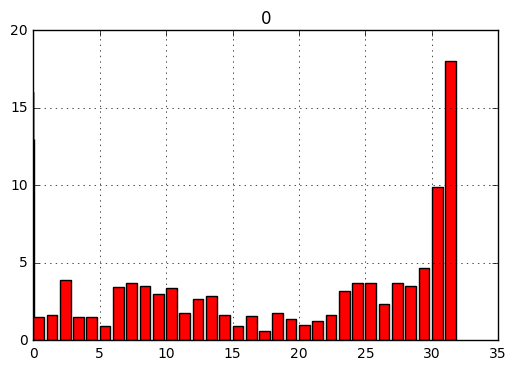

In [25]:
# Features selecting Feature Importance

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

%matplotlib inline
import matplotlib.pyplot as plt


clfscr = RandomForestClassifier(n_estimators=100)
scores = cross_validation.cross_val_score(clfscr, X, Y, cv=8)

clfscr = clfscr.fit(X, Y)
print(clfscr.feature_importances_)

pddq = pd.DataFrame(clfscr.feature_importances_)

pddq.hist()

yy = clfscr.feature_importances_
NN = len(yy)
xx = range(NN)
print (yy)
width = 1/1.5
plt.bar(xx, yy*100, color="red")




In [26]:
X.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'PG1', u'PG2'],
      dtype='object')

[  17.423    9.162    4.051    9.866    2.815    0.977   24.826   21.666
    9.506    7.694    8.918    2.141    9.09    13.854  196.419   20.716
    7.129   14.123    8.747    2.965   11.252    3.675    8.594    2.142
    7.883   13.278   30.299   22.97     9.828  181.913  221.98   279.95 ]
[[ 0  0 11 12]
 [ 0  4 11 11]
 [ 0  2 14 13]
 ..., 
 [ 0  0 15 13]
 [ 0  6 16 16]
 [ 0  8 15 15]]


<Container object of 32 artists>

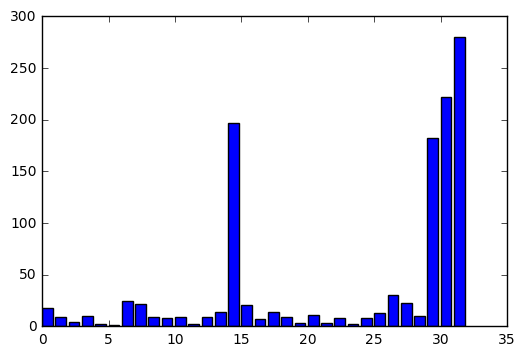

In [27]:
# feature extraction Univariate Selection

testK = SelectKBest(score_func=chi2, k=4)
fit = testK.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[:,:])


yu = fit.scores_
N = len(yu)
x = range(N)
width = 1/1.5
plt.bar(x, yu, color="blue")

In [28]:
X.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'PG1', u'PG2'],
      dtype='object')

In [29]:
# feature extraction  Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

5
[ True False False False False False False False False False False False
  True False  True  True False False False False  True False False False
 False False False False False False False False]
[ 1 13  6  2 15 10 21 11 14 24 20 17  1 22  1  1  8  3 16 18  1 28 12 27 23
  9  4 26 19 25  7  5]


In [30]:
X.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'PG1', u'PG2'],
      dtype='object')

In [31]:
# feature extraction  PCA

from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print(fit.explained_variance_ratio_)
print(fit.components_)

[ 0.373  0.252  0.061]
[[  9.435e-03   5.490e-03   5.427e-02   4.768e-04   4.534e-03  -6.473e-03
   -2.520e-02  -2.115e-02   3.453e-02   1.734e-02  -1.898e-02  -8.630e-03
    2.678e-03  -3.860e-02   3.291e-02   1.836e-03  -4.080e-03  -1.020e-03
   -4.742e-03  -7.203e-03  -1.413e-02   3.389e-04   6.967e-03  -2.152e-02
    2.267e-03   3.316e-02   4.852e-02   5.920e-02   8.113e-03   9.187e-01
   -2.610e-01  -2.671e-01]
 [  4.392e-02  -1.336e-02  -2.818e-02   2.757e-02  -9.057e-04  -9.109e-03
    8.916e-02   7.231e-02  -6.398e-02  -4.684e-02  -5.269e-02   2.039e-03
   -3.490e-02   4.315e-02  -5.494e-02  -8.543e-03   1.109e-02  -4.105e-03
    9.465e-03   6.028e-03   2.886e-02   1.785e-02  -4.570e-03   9.886e-03
   -3.209e-02  -2.833e-02  -3.159e-02  -4.004e-02  -2.117e-02   3.843e-01
    6.107e-01   6.639e-01]
 [  4.160e-02   7.678e-02  -2.103e-02   3.736e-02  -6.544e-03   5.874e-03
    4.082e-01   4.091e-01  -5.220e-01  -3.003e-01  -2.323e-03   3.054e-02
   -9.069e-02   6.503e-03  -5.771e-

In [32]:
X.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'PG1', u'PG2'],
      dtype='object')

In [33]:
#XF = X[['age','failures','absences','PG1','PG2']]
XF = X[['PG1','PG2']]

In [34]:
XF.head()

,PG1,PG2
0,11,12
1,11,11
2,14,13
3,10,11
4,12,11


In [35]:
#using SVM
from sklearn import svm

In [36]:
clfsvm = svm.SVC()
clfsvm.fit(X, Y) 

fsvm = svm.SVC()
fsvm.fit(XF, Y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
scores = cross_validation.cross_val_score(clfsvm, X, Y, cv=8)
print("svm Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


scoresf = cross_validation.cross_val_score(fsvm, XF, Y, cv=8)
print("svm Accuracy: %0.2f (+/- %0.2f)" % (scoresf.mean(), scoresf.std() * 2))


svm Accuracy: 0.40 (+/- 0.08)
svm Accuracy: 0.53 (+/- 0.14)


In [38]:
# Train classifier Random Forest
#clf = RandomForestClassifier(n_estimators=int(X.shape[1] / 2))
clf = RandomForestClassifier(n_estimators=100)
scores = cross_validation.cross_val_score(clf, X, Y, cv=8)
print("RandomForese Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
clf = clf.fit(X, Y)



# Train classifier Random Forest
#clf = RandomForestClassifier(n_estimators=int(X.shape[1] / 2))
clfF = RandomForestClassifier(n_estimators=100)
scoresF = cross_validation.cross_val_score(clfF, XF, Y, cv=8)
print("RandomForese Accuracy: %0.2f (+/- %0.2f)" % (scoresF.mean(), scoresF.std() * 2))
clfF = clfF.fit(XF, Y)

RandomForese Accuracy: 0.38 (+/- 0.10)
RandomForese Accuracy: 0.50 (+/- 0.14)


In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X, Y)

gnb = GaussianNB()
gnbF = gnb.fit(XF, Y)



In [40]:
test.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,PG1,PG2,PG3
0,269,GP,M,16,U,LE3,T,4,3,teacher,...,5,4,5,1,1,3,7,14,14,15
1,484,MS,F,16,U,LE3,A,2,2,other,...,4,3,4,1,2,1,6,7,7,8
2,84,GP,F,15,U,GT3,T,1,1,other,...,4,3,2,2,3,4,2,13,12,12
3,436,MS,F,15,R,LE3,T,1,1,other,...,4,4,3,1,2,2,4,6,7,8
4,569,MS,M,18,U,GT3,T,3,3,at_home,...,4,4,5,1,3,3,9,4,8,8


In [41]:
# Split train set to X(features), Y(labels)
print("\n\nTest set size: %s" % (test.shape,))
toPredictTestSet = test.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'PG1', 'PG2']]

# For Sex, convert male ->1, female -> 0
sex_map = {"M":1, "F":0}
toPredictTestSet.loc[:, "sex"] = toPredictTestSet.loc[:, "sex"].map(sex_map)

# For romantic, convert yes ->1, no -> 0
romantic_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "romantic"] = toPredictTestSet.loc[:, "romantic"].map(romantic_map)

# For internet, convert yes ->1, no -> 0
internet_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "internet"] = toPredictTestSet.loc[:, "internet"].map(internet_map)

# For schoolsup, convert yes ->1, no -> 0
schoolsup_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "schoolsup"] = toPredictTestSet.loc[:, "schoolsup"].map(schoolsup_map)


# For famsup, convert yes ->1, no -> 0
famsup_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "famsup"] = toPredictTestSet.loc[:, "famsup"].map(famsup_map)

# For paid, convert yes ->1, no -> 0
paid_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "paid"] = toPredictTestSet.loc[:, "paid"].map(paid_map)

# For activities, convert yes ->1, no -> 0
activities_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "activities"] = toPredictTestSet.loc[:, "activities"].map(activities_map)

# For nursery, convert yes ->1, no -> 0
nursery_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "nursery"] = toPredictTestSet.loc[:, "nursery"].map(nursery_map)

# For higher, convert yes ->1, no -> 0
higher_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "higher"] = toPredictTestSet.loc[:, "higher"].map(higher_map)

# For school, convert gp ->1, ms -> 0
school_map = {"GP":1, "MS":0}
toPredictTestSet.loc[:, "school"] = toPredictTestSet.loc[:, "school"].map(school_map)

# For address, convert U ->1, R -> 0
address_map = {"U":1, "R":0}
toPredictTestSet.loc[:, "address"] = toPredictTestSet.loc[:, "address"].map(address_map)

# For famsize, convert GT3 ->1, LE3 -> 0
famsize_map = {"GT3":1, "LE3":0}
toPredictTestSet.loc[:, "famsize"] = toPredictTestSet.loc[:, "famsize"].map(famsize_map)


# For Pstatus, convert T ->1, A -> 0
Pstatus_map = {"T":1, "A":0}
toPredictTestSet.loc[:, "Pstatus"] = toPredictTestSet.loc[:, "Pstatus"].map(Pstatus_map)

# For Mjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Mjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
toPredictTestSet.loc[:, "Mjob"] = toPredictTestSet.loc[:, "Mjob"].map(Mjob_map)

# For Fjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Fjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
toPredictTestSet.loc[:, "Fjob"] = toPredictTestSet.loc[:, "Fjob"].map(Fjob_map)

# For reason, convert "home" -> 1 "reputation" ->2 "course" ->3 "other" -> 4
reason_map = {"home":1,"reputation":2,"course":3,"other":4}
toPredictTestSet.loc[:, "reason"] = toPredictTestSet.loc[:, "reason"].map(reason_map)

# For guardian, convert mother ->2, father -> 1 other -> 0
guardian_map = {"mother":2, "father":1, "other":0}
toPredictTestSet.loc[:, "guardian"] = toPredictTestSet.loc[:, "guardian"].map(guardian_map)

toPredictTestSet.to_csv('testView.csv', sep=',')





Test set size: (195, 34)


In [42]:
#predictF = toPredictTestSet[['age','failures','absences','PG1','PG2']]
#predictF = toPredictTestSet[['failures','absences','PG1','PG2']]
predictF = toPredictTestSet[['PG1','PG2']]

In [43]:
resultRF = clf.predict(toPredictTestSet)
resultRFF = clfF.predict(predictF)


resultSVM = clfsvm.predict(toPredictTestSet)
resultSVMF = fsvm.predict(predictF)


#resultGNB = gnb.predict(toPredictTestSet)
resultGNBF = gnb.predict(predictF)

In [56]:
from sklearn.metrics import accuracy_score
y_true = test.loc[:,"PG3"]
print("Results---------------------->")
print("Accuracy using Random Forest:")
print (accuracy_score(y_true, resultRF))

print("Accuracy using Random Forest with less features:")
print (accuracy_score(y_true, resultRFF))

print("Results---------------------->")
print("Accuracy using SVM:")
print (accuracy_score(y_true, resultSVM))

print("Accuracy using SVM with less features:")
print (accuracy_score(y_true, resultSVMF))

print("Results---------------------->")
print("Accuracy using Naive with less features:")
print (accuracy_score(y_true, resultGNBF))



Results---------------------->
Accuracy using Random Forest:
0.420512820513
Accuracy using Random Forest with less features:
0.415384615385
Accuracy using SVM:
0.348717948718
Accuracy using SVM with less features:
0.425641025641
Accuracy using Naive with less features:
0.415384615385


In [92]:
prediction = pd.DataFrame({"school":test.loc[:,"school"],"sex":test.loc[:,"sex"],"age":test.loc[:,"age"],"address":test.loc[:,"address"], "famsize":test.loc[:,"famsize"],"Pstatus":test.loc[:,"Pstatus"],"Medu":test.loc[:,"Medu"],"Fedu":test.loc[:,"Fedu"],"Mjob":test.loc[:,"Mjob"],"Fjob":test.loc[:,"Fjob"],"reason":test.loc[:,"reason"],"guardian":test.loc[:,"guardian"], "traveltime":test.loc[:,"traveltime"],"studytime":test.loc[:,"studytime"],"failures":test.loc[:,"failures"], "schoolsup":test.loc[:,"schoolsup"], "famsup":test.loc[:,"famsup"], "paid":test.loc[:,"paid"], "activities":test.loc[:,"activities"],"nursery":test.loc[:,"nursery"],"higher":test.loc[:,"higher"], "internet":test.loc[:,"internet"],"romantic":test.loc[:,"romantic"], "famrel":test.loc[:,"famrel"], "freetime":test.loc[:,"freetime"],"goout":test.loc[:,"goout"], "Dalc":test.loc[:,"Dalc"],"Walc":test.loc[:,"Walc"], "health":test.loc[:,"health"], "PG1":test.loc[:,"PG1"], "PG2":test.loc[:,"PG2"],"predictedMarks": resultSVMF})
prediction.to_csv('result1.csv', index=False)

In [142]:
'''
from sklearn.metrics import accuracy_score
y_true = test.loc[:,"PG3"]
accuracy_score(y_true, result)
'''

0.44102564102564101